In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
seasons = pd.read_csv('Data/nba_player_stats_by_season.csv', index_col = 'id')
careers = pd.read_csv('Data/nba_player_stats_by_career.csv', index_col = 'id')

In [3]:
# Create a few extra columns
def get_min_age(player_id):
    return seasons[seasons['player_id'] == player_id]['age'].min()

seasons['min_age'] = seasons['player_id'].apply(get_min_age)
seasons['min_age_rounded'] = seasons['min_age'].apply(lambda x: int(np.floor(x)))
seasons['age_rounded'] = seasons['age'].apply(lambda x: int(np.floor(x)))

careers['min_age'] = careers['player_id'].apply(get_min_age)
careers['min_age_rounded'] = careers['min_age'].apply(lambda x: int(np.floor(x)))

In [4]:
seasons.shape

(12736, 96)

In [5]:
seasons.columns

Index(['and_ones', 'assist_percentage', 'assists', 'block_percentage',
       'blocking_fouls', 'blocks', 'box_plus_minus', 'center_percentage',
       'defensive_box_plus_minus', 'defensive_rebound_percentage',
       'defensive_rebounds', 'defensive_win_shares', 'dunks',
       'effective_field_goal_percentage', 'field_goal_attempts',
       'field_goal_perc_sixteen_foot_plus_two_pointers',
       'field_goal_perc_ten_to_sixteen_feet',
       'field_goal_perc_three_to_ten_feet',
       'field_goal_perc_zero_to_three_feet', 'field_goal_percentage',
       'field_goals', 'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'half_court_heaves', 'half_court_heaves_made', 'height',
       'lost_ball_turnovers', 'minutes_played', 'nationality',
       'net_plus_minus', 'offensive_box_plus_minus', 'offensive_fouls',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', '

In [6]:
# remove seasons with less than 1500 minutes.
# this is the minimum minutes requirement per BBallRef to qualify for PER.

qseasons = seasons[seasons['minutes_played'] > 1500]

## Basic Data Exploration

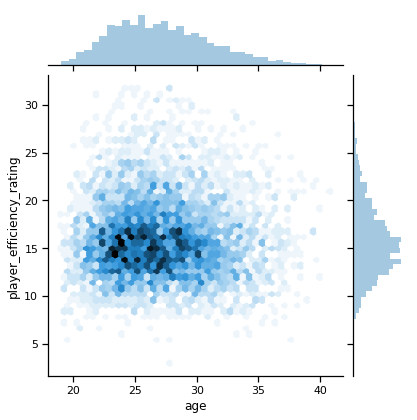

In [18]:
sns.set_context('notebook') # set to 'talk' for bigger font and lines
sns.jointplot(x = qseasons['age'], y = qseasons['player_efficiency_rating'], kind = 'hex');

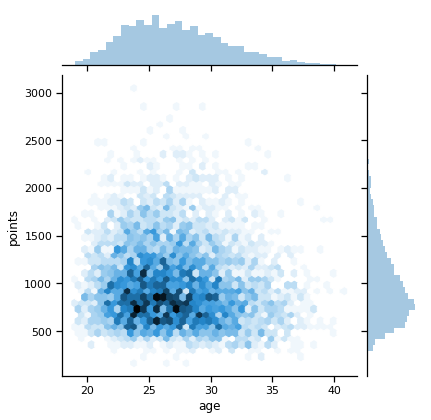

In [10]:
sns.set_context('notebook') # set to 'talk' for bigger font and lines
sns.jointplot(x = qseasons['age'], y = qseasons['points'], kind = 'hex');

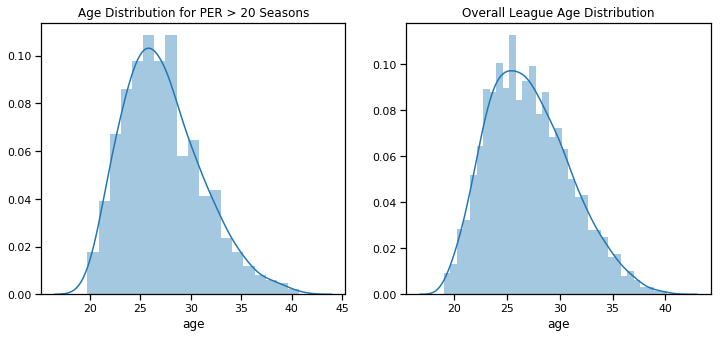

In [22]:
plt.figure(figsize=(12,5))
sns.set_context('notebook') # set to 'talk' for bigger font and lines
plt.subplot(1,2,1)
sns.distplot(qseasons[qseasons['player_efficiency_rating'] > 20]['age'])
plt.title('Age Distribution for PER > 20 Seasons')
# Distplot above is really just a distribution of ages
# Look at average PER instead
plt.subplot(1,2,2)
sns.distplot(qseasons['age'])
plt.title('Overall League Age Distribution');

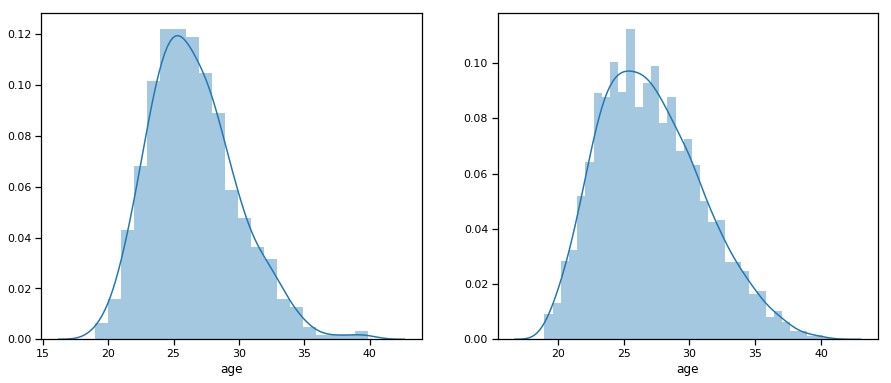

In [13]:
plt.figure(figsize=(15,6))
sns.set_context('notebook') # set to 'talk' for bigger font and lines
plt.subplot(1,2,1)
sns.distplot(qseasons[qseasons['points'] > 1500]['age'])
# Distplot above is really just a distribution of ages
# Look at average PER instead
plt.subplot(1,2,2)
sns.distplot(qseasons['age']);

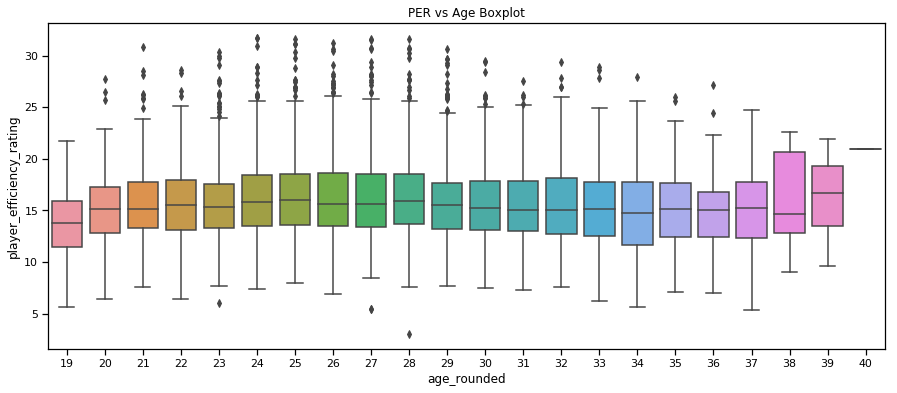

In [21]:
plt.figure(figsize=(15,6))
sns.set_context('notebook')
sns.boxplot(x = qseasons['age_rounded'], y = qseasons['player_efficiency_rating'])
plt.title('PER vs Age Boxplot');

## Segment by When Players Entered the NBA

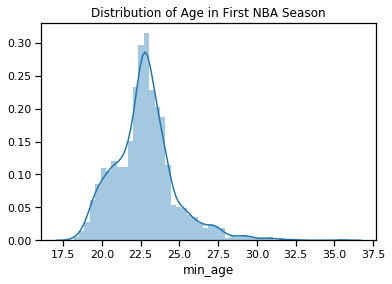

In [23]:
# distplot of when players enter the league
# most players enter the league between ages of 20 and 25
sns.set_context('notebook')
sns.distplot(careers['min_age'])
plt.title('Distribution of Age in First NBA Season');

In [12]:
careers['min_age_rounded'].value_counts()

22    549
23    432
21    264
20    219
24    188
19    139
25     90
26     48
27     44
18     15
29     13
28     12
30      6
31      4
32      2
35      1
Name: min_age_rounded, dtype: int64

In [32]:
# combine 18 and 19 year old age groups

qseasons['min_age_rounded'] = qseasons['min_age_rounded'].apply(lambda x: 19 if x <= 19 else x)

/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


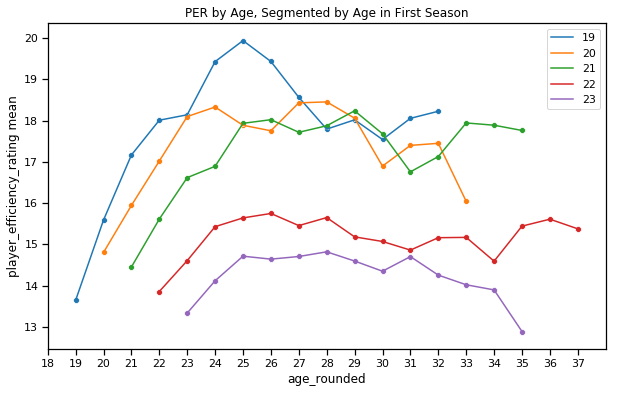

In [39]:
# given the above lets only consider players who entered between ages of 18 and 23
# segment qseasons by min_age_rounded and plot
plt.figure(figsize=(10,6))
sns.set_context('notebook')
plt.xticks(ticks = [x for x in range(18,38)])
plt.title("PER by Age, Segmented by Age in First Season")
plt.xlim((18,38))

for i in range(19, 24):
    temp_df = qseasons[qseasons['min_age_rounded'] == i][['age_rounded', 'player_efficiency_rating']]
    temp_df = temp_df.groupby(by = 'age_rounded').agg(['mean', 'count'])
    temp_df.columns = [' '.join(col).strip() for col in temp_df.columns.values]
    temp_df = temp_df[temp_df['player_efficiency_rating count'] > 10]['player_efficiency_rating mean']
    sns.lineplot(x = temp_df.index, y = temp_df, label = i)
    sns.scatterplot(x = temp_df.index, y = temp_df);

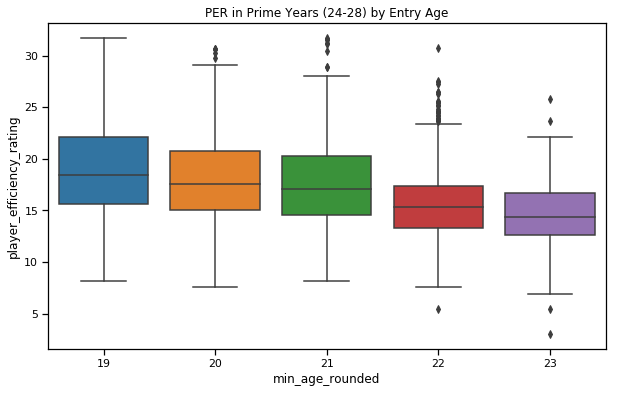

In [40]:
temp_df = qseasons[np.array(qseasons['min_age_rounded'] <= 23) & np.array(qseasons['age_rounded'] <= 28) &
                  np.array(qseasons['age_rounded'] >= 24)]

plt.figure(figsize=(10,6))
sns.set_context('notebook') # set to 'talk' for bigger font and lines
sns.boxplot(x = temp_df['min_age_rounded'], y = temp_df['player_efficiency_rating'])
plt.title('PER in Prime Years (24-28) by Entry Age');